In [11]:
# Import all necessary libraries
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [106]:
# Download files at: https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip
PATH = 'cats_and_dogs'
# Get paths for pictures
train_dir = os.path.join(PATH, 'training_set')
validation_dir = os.path.join(PATH, 'test_set')
test_dir = os.path.join(PATH, 'test')
# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))
# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 128
IMG_WIDTH = 128

In [107]:
# Rescale image data
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)
# Initialize data generators for train, validation and test
train_data_gen = train_image_generator.flow_from_directory(train_dir,target_size=(IMG_HEIGHT, IMG_WIDTH), batch_size=batch_size, class_mode='binary')
val_data_gen = validation_image_generator.flow_from_directory(validation_dir, target_size=(IMG_HEIGHT, IMG_WIDTH), batch_size=batch_size, class_mode='binary')
test_data_gen = test_image_generator.flow_from_directory(PATH, target_size=(IMG_HEIGHT, IMG_WIDTH), batch_size=batch_size, class_mode='binary', classes=['test'])

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


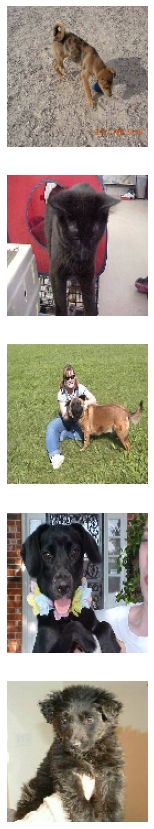

In [14]:
# Plot first five images
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])

In [108]:
# 5
train_image_generator = ImageDataGenerator(rescale=1./255, rotation_range=20, horizontal_flip=True, shear_range=0.2, zoom_range=0.2, width_shift_range=0.1, height_shift_range=0.1)

Found 8005 images belonging to 2 classes.


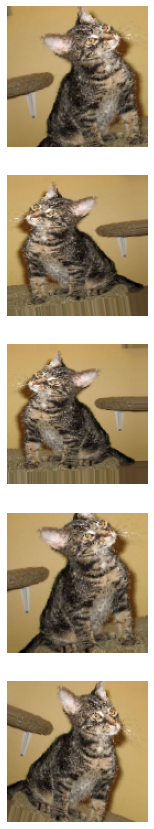

In [109]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [110]:
# 7

model = Sequential([
    # Block One
    #layers.BatchNormalization(input_shape=[IMG_HEIGHT, IMG_WIDTH, 3], renorm=True),
    layers.Conv2D(filters=16, kernel_size=3, padding='same', input_shape=[IMG_HEIGHT, IMG_WIDTH, 3]),
    layers.MaxPool2D(2,2),
    layers.ReLU(),

    # Block Two
    layers.Conv2D(filters=32, kernel_size=3, padding='same'),
    layers.MaxPool2D(2,2),
    layers.ReLU(),

    layers.Conv2D(filters=64, kernel_size=3, padding='same'),
    layers.MaxPool2D(2,2),
    layers.ReLU(),

    # Head
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
    ])

model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_116 (Conv2D)         (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 re_lu_22 (ReLU)             (None, 64, 64, 16)        0         
                                                                 
 conv2d_117 (Conv2D)         (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 re_lu_23 (ReLU)             (None, 32, 32, 32)       

In [111]:
# 8
history = model.fit(x=train_data_gen, validation_data=val_data_gen, epochs=50)

Epoch 1/50
63/63 [==============================] - 73s 1s/step - loss: 0.7929 - accuracy: 0.5578 - val_loss: 0.6572 - val_accuracy: 0.6545
Epoch 2/50
63/63 [==============================] - 59s 941ms/step - loss: 0.6744 - accuracy: 0.5936 - val_loss: 0.6211 - val_accuracy: 0.6461
Epoch 3/50
63/63 [==============================] - 57s 898ms/step - loss: 0.6425 - accuracy: 0.6437 - val_loss: 0.6002 - val_accuracy: 0.6826
Epoch 4/50
63/63 [==============================] - 56s 894ms/step - loss: 0.6196 - accuracy: 0.6601 - val_loss: 0.5551 - val_accuracy: 0.7039
Epoch 5/50
63/63 [==============================] - 56s 887ms/step - loss: 0.5873 - accuracy: 0.6939 - val_loss: 0.5737 - val_accuracy: 0.6826
Epoch 6/50
63/63 [==============================] - 56s 887ms/step - loss: 0.5643 - accuracy: 0.7057 - val_loss: 0.5622 - val_accuracy: 0.7039
Epoch 7/50
63/63 [==============================] - 56s 886ms/step - loss: 0.5459 - accuracy: 0.7232 - val_loss: 0.4948 - val_accuracy: 0.7632
Ep

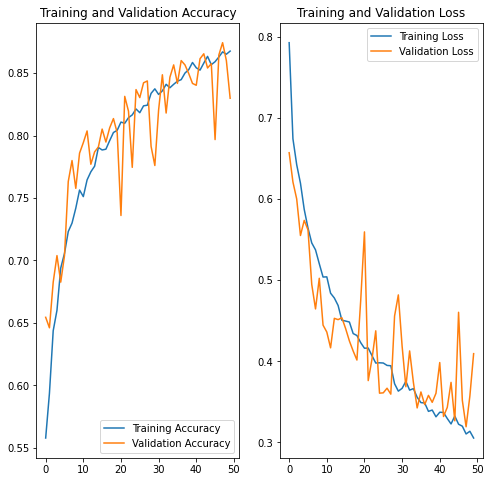

In [113]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()